<div style="text-align:right;">May Laurent - Juin 2021</div>

# Etude de santé publique

Food and Agriculture Organization of the United Nations
http://www.fao.org/home/fr/

## Objectifs de l'étude
L'étude porte sur la mise en évidence des principaux indicateurs pour l'année 2017 :
* Proportion de personnes en état de sous-nutrition
* Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte.
* Nombre théorique de personnes qui pourraient être nourries.
* Nombre théorique de personnes qui pourraient être nourries avec uniquement des produits d'origine végétaux.
* Utilisation de la disponibilité intérieure.
* Pays ayant le plus/le moins de disponibilité/habitant.
* Pays qui ont le plus bénéficié d’aide depuis 2013.

## Mise en place de l'environnement

### Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import os, sys
from IPython.display import display
import matplotlib.pyplot as plt

### Constantes et config

In [2]:
# path to data folder
DATA_PATH = os.path.realpath('') + '/data/'

# Pandas settings
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 100)
pd.options.display.float_format = '{:,.2f}'.format

# 'sous_nutrition' columns names
under_nourish_COL_NAMES = {
    'Zone':   'country',
    'Année':  'year',
    'Valeur': 'nb_under_nourish'
}

# 'population' columns names
POP_COL_NAMES = {
    'Zone':   'country',
    'Année':  'year',
    'Valeur': 'pop_size'
}

# 'disponibilité alimentaire' columns names
DISPO_FOOD_COL_NAMES = {
    'Zone':                                                          'country',
    'Produit':                                                       'products',
    'Origine':                                                       'food_origin',
    'Aliments pour animaux':                                         'food_for_animals',
    'Autres Utilisations':                                           'other_use',
    'Disponibilité alimentaire (Kcal/personne/jour)':                'food_supply_kcal_avl',
    'Disponibilité alimentaire en quantité (kg/personne/an)':        'food_amount_kg_avl',
    'Disponibilité de matière grasse en quantité (g/personne/jour)': 'fat_supply_g_avl',
    'Disponibilité de protéines en quantité (g/personne/jour)':      'prot_amount_g_avl',
    'Disponibilité intérieure':                                      'domestic_amount',
    'Exportations - Quantité':                                       'export_amount',
    'Importations - Quantité':                                       'import_amount',
    'Nourriture':                                                    'food_amount',
    'Pertes':                                                        'losses',
    'Production':                                                    'production',
    'Semences':                                                      'seed',
    'Traitement':                                                    'processing',
    'Variation de stock':                                            'stock_variation'
}

# 'aide alimentaire' columns names
HELP_COL_NAMES = {
    'Pays bénéficiaire':  'country',
    'Année':              'year',
    'Produit':            'product',
    'Valeur':             'help_product_value'
}

CEREALS_LIST = [
    'Maïs',
    'Blé',
    'Céréales, Autres',
    'Millet',
    'Orge',
    'Riz (Eq Blanchi)',
    'Avoine',
    'Seigle',
    'Sorgho'
]

# world population size 2017 published
WEB_WORLD_POP_SIZE_2017 = 7500000000

### Fonctions

In [3]:
# import csv file
def import_csv_to_dataframe(filename):
    try:
        return pd.read_csv(DATA_PATH + filename, encoding='utf8')
    except Exception as e:
        print(">>> Le fichier {} est introuvable.".format(filename))
        sys.exit(e)
        
# calculte pourcentage
def prop(nb_1, nb_2):
    return round(nb_1 / nb_2 * 100, 2)

## Importation des données
Nous avons 4 fichiers de données :
* Sous-nutrition  
* Population  
* Disponibilité alimentaire   
* Aide alimentaire  

Création d'un dataframe par fichier de données.

### Données sous nutrition

In [4]:
# import_amount sous_nutrition data to dataframe
df_under_nourish = import_csv_to_dataframe("sous_nutrition.csv")

# Change colums names
df_under_nourish.rename(
    columns = under_nourish_COL_NAMES,
    inplace = True
)

# Convert date
df_under_nourish["year"] = [
    int(
        np.median(
            list(map(int, i.split("-")))
        )
    ) for i in df_under_nourish['year']
]

# Clean data
df_under_nourish['nb_under_nourish'] = df_under_nourish['nb_under_nourish'].replace(['<0.1'], 0.01).astype(float)

# Convert people's count from million to units
df_under_nourish['nb_under_nourish'] = df_under_nourish['nb_under_nourish'] * 1000000

In [68]:
display(df_under_nourish.head(5))

,country,year,nb_under_nourish
0,Afghanistan,2013,"8,600,000.00"
1,Afghanistan,2014,"8,800,000.00"
2,Afghanistan,2015,"8,900,000.00"
3,Afghanistan,2016,"9,700,000.00"
4,Afghanistan,2017,"10,500,000.00"


### Données population

In [6]:
# import_amount population data to dataframe
df_pop = import_csv_to_dataframe("population.csv")

# Change colums names
df_pop.rename(
    columns = POP_COL_NAMES,
    inplace = True
)

# Convert people's count from thousands to units
df_pop['pop_size'] = df_pop['pop_size'] * 1000

In [7]:
display(df_pop.sample(5))

,country,year,pop_size
223,Cambodge,2014,"15,274,503.00"
1081,République dominicaine,2014,"10,165,183.00"
1007,Pérou,2018,"31,989,260.00"
241,Chili,2014,"17,758,959.00"
785,Malawi,2018,"18,143,217.00"


### Données disponibilité alimentaire

In [8]:
# import_amount dispo_alimentataire data to dataframe
df_foods_avl = import_csv_to_dataframe("dispo_alimentaire.csv")

# Change colums names
df_foods_avl.rename(
    columns = DISPO_FOOD_COL_NAMES,
    inplace = True
)

# Add cereals criteria
df_foods_avl['is_cereals'] = np.where(df_foods_avl['products'].isin(CEREALS_LIST), True, False)

# clean data
df_foods_avl.fillna(0, inplace=True)

# rearrange columns
df_foods_avl = df_foods_avl[[
    'country', 'products', 'food_origin',
    'production', 'import_amount', 'export_amount', 'stock_variation',
    'domestic_amount',
    'food_amount_kg_avl', 'food_supply_kcal_avl', 'prot_amount_g_avl', 'fat_supply_g_avl',
    'food_amount', 'food_for_animals', 'other_use', 'losses', 'seed', 'processing',
    'is_cereals'
    ]]

In [9]:
display(df_foods_avl.sample(5))

,country,products,food_origin,production,import_amount,export_amount,stock_variation,domestic_amount,food_amount_kg_avl,food_supply_kcal_avl,prot_amount_g_avl,fat_supply_g_avl,food_amount,food_for_animals,other_use,losses,seed,processing,is_cereals
15365,États-Unis d'Amérique,"Fruits, Autres",vegetale,"5,290.00","4,683.00","2,336.00",51.00,"7,688.00",22.98,29.00,0.40,0.82,"7,354.00",0.00,0.00,365.00,0.00,0.00,False
12436,Sainte-Lucie,Oignons,vegetale,0.00,1.00,0.00,0.00,1.00,4.81,6.00,0.20,0.03,1.00,0.00,0.00,0.00,0.00,0.00,False
9832,Nigéria,Miel,vegetale,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,False
2951,Chili,Millet,vegetale,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,True
14412,Ukraine,Raisin,vegetale,575.00,119.00,0.00,0.00,694.00,8.04,13.00,0.12,0.07,364.00,0.00,1.00,37.00,0.00,293.00,False


Lien entre les variables :  
* domestic_supply = production  +  import_amount_amount  -  export  +  stock_variation  
* domestic_supply = food_amount  +  food_for_animals  +  other_use  +  losses  +  seed  +  processing  

### Données aide alimentaire

In [10]:
# import_amount food help data to dataframe
df_foods_help = import_csv_to_dataframe("aide_alimentaire.csv")

# Change colums names
df_foods_help.rename(
    columns = HELP_COL_NAMES,
    inplace = True
)

In [11]:
display(df_foods_help.sample(5))

,country,year,product,help_product_value
1267,Soudan,2015,Autres non-céréales,255
54,Algérie,2016,"Sucre, total",360
709,Libéria,2013,"Riz, total",8060
605,Jordanie,2015,Céréales,1370
1018,République arabe syrienne,2013,Huiles végétales,27721


***
## Vérification des données

### Cohérence taille population

Vérification de l'intégrité des données provenant du fichier 'population'.

In [12]:
df_pop_2017 = df_pop.loc[df_pop['year'] == 2017]

nb_unique_country_pop = len(df_pop_2017.country.unique())
total_pop_size = df_pop_2017['pop_size'].sum()
gap_world_pop_size = (WEB_WORLD_POP_SIZE_2017 / total_pop_size) - 1

print(f"""
Population totale :
- {nb_unique_country_pop} pays
- fichier population : {total_pop_size:,}
- population mondiale communiquée : {WEB_WORLD_POP_SIZE_2017:,}
Gap : {gap_world_pop_size}
""")


Population totale :
- 236 pays
- fichier population : 7,548,134,111.0
- population mondiale communiquée : 7,500,000,000
Gap : -0.006376954925834344



L'écart de taille de population entre les données du fichier et la valeur officiel est négligeable.  
Les données de taille de population sont cohérents.  

### Vérification données sous-nutrition

In [13]:
df_under_nourish_2017 = df_under_nourish.loc[df_under_nourish['year'] == 2017]
nb_unique_country_under_nourish = len(df_under_nourish_2017.country.unique())

print(f"""Les données de sous-nutrition pour 2017 concernent {nb_unique_country_under_nourish} pays.""")

Les données de sous-nutrition pour 2017 concernent 203 pays.


### Vérification données disponibilité alimentaire

In [14]:
nb_unique_country_food_avl = len(df_foods_avl.country.unique())

print(f"""Les données de disponibilité alimentaire concernent {nb_unique_country_food_avl} pays.""")

Les données de disponibilité alimentaire concernent 174 pays.


### Vérification données aide alimentaire

In [15]:
nb_unique_country_food_help = len(df_foods_help.country.unique())

print(f"""Les données d'aide alimentaire concernent {nb_unique_country_food_help} pays.""")

Les données d'aide alimentaire concernent 76 pays.


### Remarque sur les données
Nous n'avons pas de données de disponibilité alimentaire pour tous les pays. Nous allons donc travailler sur un échantillion et appliquer les résultats sur la population mondiale réelle.

## Besoins journaliers recommandés

Le poids moyen d'un adulte est de **62 kg**. *(Source - BMC Public Health [www.https://bmcpublichealth.biomedcentral.com](https://bmcpublichealth.biomedcentral.com/articles/10.1186/1471-2458-12-439 "titre de lien optionnel"). )*

Le besoin moyen en kcal est de **2500 kcal / jour** . *(Source - BMC Public Health [www.ncbi.nlm.nih.gov/](https://www.ncbi.nlm.nih.gov/books/NBK234938/ "titre de lien optionnel"). )*

La référence nutritionnelle en protéines des adultes en bonne santé (RNP) est de **0,83 g / kg / jour** .
*(Source - anses [www.anses.fr](https://www.anses.fr/fr/content/les-prot%C3%A9ines#:~:text=Les%20recommandations%20de%20l'Agence,83%20g%2Fkg%2Fj. "titre de lien optionnel"). )*

In [16]:
# kcal need by year
KCAL_NEED = 2500 * 365

# protein need by year
PROTEIN_NEED = 0.83 * 62 * 365

***
# Sous-nutrition

## Proportion de personnes en état de sous-nutrition en 2017

### Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [17]:
df_under_nourish_pop = pd.merge(df_under_nourish_2017, df_pop_2017)

# Under-nutrition by zone
df_under_nourish_pop["prop_under_nourish"] = prop(df_under_nourish_pop["nb_under_nourish"], df_under_nourish_pop["pop_size"])
df_under_nourish_pop["is_under_nourish"] = df_under_nourish_pop["nb_under_nourish"] > 0

df_under_nourish_pop = df_under_nourish_pop.sort_values(["prop_under_nourish"], ascending=False)

In [18]:
display(df_under_nourish_pop.head(10))

,country,year,nb_under_nourish,pop_size,prop_under_nourish,is_under_nourish
78,Haïti,2017,"5,300,000.00","10,982,366.00",48.26,True
157,République populaire démocratique de Corée,2017,"12,000,000.00","25,429,825.00",47.19,True
108,Madagascar,2017,"10,500,000.00","25,570,512.00",41.06,True
103,Libéria,2017,"1,800,000.00","4,702,226.00",38.28,True
100,Lesotho,2017,"800,000.00","2,091,534.00",38.25,True
183,Tchad,2017,"5,700,000.00","15,016,753.00",37.96,True
161,Rwanda,2017,"4,200,000.00","11,980,961.00",35.06,True
121,Mozambique,2017,"9,400,000.00","28,649,018.00",32.81,True
186,Timor-Leste,2017,"400,000.00","1,243,258.00",32.17,True
0,Afghanistan,2017,"10,500,000.00","36,296,113.00",28.93,True


Les pays les plus touchés par le sous-nutrition sont localisés principalement en Afrique et au moyen-orient.

### Proportion mondiale de personnes en état de sous-nutrition en 2017

In [19]:
# World proportion
total_nb_under_nourish = df_under_nourish_pop["nb_under_nourish"].sum().astype(int)
prop_world_under_nourish = prop(total_nb_under_nourish, total_pop_size)

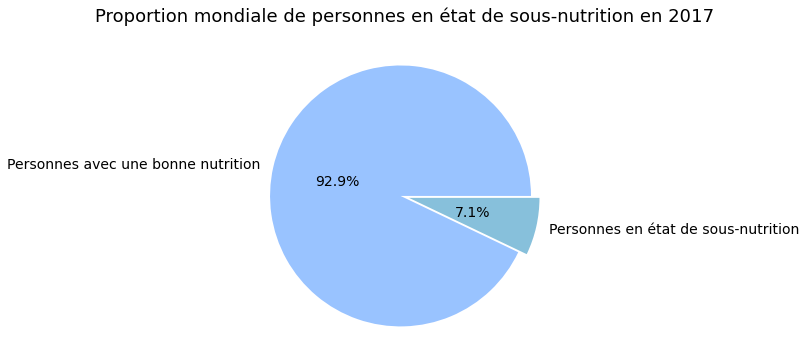


Peronnes en état de sous-nutrition en 2017: 535,900,000
Soit 7.1% de la population mondiale.



In [20]:
# chart
pie, ax = plt.subplots(figsize=[5,5])
labels = ['Personnes avec une bonne nutrition', 'Personnes en état de sous-nutrition']
values = [100 - prop_world_under_nourish, prop_world_under_nourish]
colors = ['#99C3FF','#87C0DB']
plt.pie(x=values, autopct="%.1f%%", explode=[0.04]*2, labels=labels, pctdistance=0.5, radius=1.2, textprops=dict(size=14), colors=colors)
plt.title("Proportion mondiale de personnes en état de sous-nutrition en 2017", fontsize=18, pad=40)
plt.show()

# results
print(f"""
Peronnes en état de sous-nutrition en 2017: {total_nb_under_nourish:,}
Soit {prop_world_under_nourish}% de la population mondiale.
""")

### Conclusion
La proportion de personnes en état de sous nutrition est de 7.1%. On peut donc se poser comme questions :
- Es-ce que la nourriture disponible dans le monde est suffisante ?
- Quels sont les pays les plus touchés ?
- Comment se découpe cette disponibilité pour ces pays ?

***

## Nombre théorique de personnes qui pourraient être nourries

### Disponibilité alimentaire par pays

In [21]:
df_food_avl_by_country = df_foods_avl.groupby(['country']).sum()
df_food_avl_by_country = df_food_avl_by_country.merge(df_pop_2017[['country','pop_size']], on='country')

# total population of sample
total_pop_sample = df_food_avl_by_country["pop_size"].sum()

In [22]:
display(df_food_avl_by_country.head(5))

,country,production,import_amount,export_amount,stock_variation,domestic_amount,food_amount_kg_avl,food_supply_kcal_avl,prot_amount_g_avl,fat_supply_g_avl,food_amount,food_for_animals,other_use,losses,seed,processing,is_cereals,pop_size
0,Afghanistan,"11,171.00","2,988.00",278.00,-368.00,"13,515.00",351.41,"2,087.00",58.26,33.50,"10,735.00",768.00,415.00,"1,135.00",395.00,63.00,6,"36,296,113.00"
1,Afrique du Sud,"63,263.00","7,517.00","11,674.00","2,153.00","61,256.00",564.80,"3,020.00",85.33,83.58,"29,812.00","5,309.00",876.00,"2,193.00",253.00,"22,819.00",9,"57,009,756.00"
2,Albanie,"3,964.00",933.00,94.00,-45.00,"4,758.00","1,095.54","3,188.00",111.37,106.48,"3,476.00",660.00,174.00,276.00,55.00,113.00,9,"2,884,169.00"
3,Algérie,"26,359.00","17,403.00",655.00,-479.00,"42,630.00",809.13,"3,293.00",91.92,76.48,"31,729.00","4,352.00","1,707.00","3,753.00",449.00,637.00,9,"41,389,189.00"
4,Allemagne,"154,547.00","65,353.00","57,431.00",-192.00,"162,275.00",957.52,"3,503.00",101.39,141.62,"79,238.00","30,209.00","7,711.00","3,781.00","1,551.00","39,842.00",9,"82,658,409.00"


* Rappel sur les données :  
Nous n'avons pas de données de disponibilité alimentaire pour tous les pays correspondant au fichier "Population". Nous allons donc travailler sur un échantillion et appliquer les résultats sur la population mondiale réelle.

### Calcul total en kcal disponibles

In [23]:
df_total_food_supply = df_food_avl_by_country[['country', 'pop_size', 'food_supply_kcal_avl']].copy()

# total kcal per year by country
df_total_food_supply['total_food_supply'] = df_total_food_supply['food_supply_kcal_avl'] * 365 * df_total_food_supply['pop_size']

# total world kcal
world_total_food_supply = round(df_total_food_supply["total_food_supply"].sum())

# total population could be fed by country
df_total_food_supply['nb_people_could_be_fed_kcal'] = df_total_food_supply['total_food_supply'] / KCAL_NEED

# total sample population could be fed by kcal
total_pop_could_be_fed_kcal = round(df_total_food_supply["nb_people_could_be_fed_kcal"].sum())

# proportion of peoples could be fed
prop_pop_could_be_fed_kcal = total_pop_could_be_fed_kcal / total_pop_sample

# total world population could be fed by kcal
world_total_pop_could_be_fed_kcal = round(prop_pop_could_be_fed_kcal * total_pop_size)

In [24]:
display(df_total_food_supply.head(5))

print(f"""
Total de kcal alimentaires disponibles (échantillon) : {world_total_food_supply:,}
Nombre de personne pouvant être nourrie en kcal : {world_total_pop_could_be_fed_kcal:,} ({prop_pop_could_be_fed_kcal:.01%})
""")

,country,pop_size,food_supply_kcal_avl,total_food_supply,nb_people_could_be_fed_kcal
0,Afghanistan,"36,296,113.00","2,087.00","27,648,745,558,315.00","30,299,995.13"
1,Afrique du Sud,"57,009,756.00","3,020.00","62,841,854,038,800.00","68,867,785.25"
2,Albanie,"2,884,169.00","3,188.00","3,356,076,731,780.00","3,677,892.31"
3,Algérie,"41,389,189.00","3,293.00","49,747,528,772,605.00","54,517,839.75"
4,Allemagne,"82,658,409.00","3,503.00","105,686,628,455,355.00","115,820,962.69"



Total de kcal alimentaires disponibles (échantillon) : 7,635,429,388,975,815
Nombre de personne pouvant être nourrie en kcal : 8,661,626,378 (114.8%)



### Calcul total en proteine disponible

In [25]:
df_total_protein = df_food_avl_by_country[['country', 'prot_amount_g_avl', 'pop_size']].copy()

# total kcal per year by country
df_total_protein['total_protein'] = round(df_total_protein['prot_amount_g_avl'] * 365 * df_total_protein['pop_size'])

# total world protein
world_total_protein = round(df_total_protein["total_protein"].sum())

# total population could be fed by country
df_total_protein['nb_people_could_be_fed_prot'] = df_total_protein['total_protein'] / PROTEIN_NEED

# total sample population could be fed by protein
total_pop_could_be_fed_prot = round(df_total_protein["nb_people_could_be_fed_prot"].sum())

# proportion of peoples could be fed
prop_pop_could_be_fed_prot = total_pop_could_be_fed_prot / total_pop_sample

# total world population could be fed by protein
world_total_pop_could_be_fed_prot = round(prop_pop_could_be_fed_prot * total_pop_size)

In [26]:
display(df_total_protein.head(5))

print(f"""
Total de protéines alimentaires disponibles (échantillon) : {world_total_protein:,}
Nombre de personne pouvant être nourrie en protéines : {world_total_pop_could_be_fed_prot:,} ({prop_pop_could_be_fed_prot:.01%})
""")

,country,prot_amount_g_avl,pop_size,total_protein,nb_people_could_be_fed_prot
0,Afghanistan,58.26,"36,296,113.00","771,833,213,334.00","41,092,334.69"
1,Afrique du Sud,85.33,"57,009,756.00","1,775,594,505,010.00","94,532,500.57"
2,Albanie,111.37,"2,884,169.00","117,241,614,058.00","6,241,933.57"
3,Algérie,91.92,"41,389,189.00","1,388,640,402,301.00","73,931,097.02"
4,Allemagne,101.39,"82,658,409.00","3,058,968,672,306.00","162,859,232.19"



Total de protéines alimentaires disponibles (échantillon) : 214,278,240,885,716
Nombre de personne pouvant être nourrie en protéines : 11,809,031,479 (156.4%)



### Résultats
* Pour être nourri et en bonne santé, il faut à la fois avoir suffisament de kcal et de protéines.

In [27]:
# world proportion population could be fed
prop_pop_could_be_fed = min(prop_pop_could_be_fed_kcal, prop_pop_could_be_fed_prot)

# world population could be fed
world_pop_could_be_fed = round(min(world_total_pop_could_be_fed_kcal, world_total_pop_could_be_fed_prot))

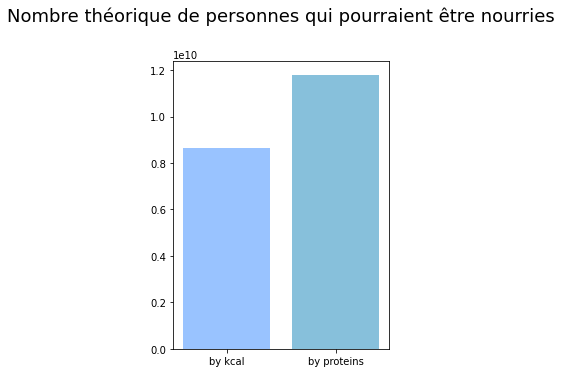


Proportion de personnes qui peuvent être nourries: 114.8%
Nombre théorique de personne qui peut être nourries dans le monde : 8,661,626,378



In [28]:
# chart
fig = plt.figure(figsize=[3,4])
ax = fig.add_axes([0,0,1,1])
labels = ['by kcal', 'by proteins']
pop_values = [
    world_total_pop_could_be_fed_kcal,
    world_total_pop_could_be_fed_prot
]
ax.bar(labels,pop_values, color=['#99C3FF', '#87C0DB'])
plt.title("Nombre théorique de personnes qui pourraient être nourries", pad=40, fontsize=18)
plt.show()

# result
print(f"""
Proportion de personnes qui peuvent être nourries: {prop_pop_could_be_fed:.01%}
Nombre théorique de personne qui peut être nourries dans le monde : {world_pop_could_be_fed:,}
""")

### Conclusion
La nourriture disponible dans le monde est suffisante pour nourrir théoriquement toute la population mondiale.  
On note une surproduction de protéines qui peut réfléter une indisponibilité de certains pays à des produits végétaux.

***

## Nombre théorique de personnes qui pourraient être nourries avec les végétaux

### Disponibilité alimentaire végétale par pays

In [29]:
df_veg_foods_avl = df_foods_avl.loc[df_foods_avl['food_origin'] == "vegetale"]
df_veg_foods_avl_by_country = df_veg_foods_avl.groupby(['country']).sum()
df_veg_foods_avl_by_country = df_veg_foods_avl_by_country.merge(df_pop_2017[['country','pop_size']], how='left', on='country')

In [30]:
display(df_veg_foods_avl_by_country.head(5))

,country,production,import_amount,export_amount,stock_variation,domestic_amount,food_amount_kg_avl,food_supply_kcal_avl,prot_amount_g_avl,fat_supply_g_avl,food_amount,food_for_animals,other_use,losses,seed,processing,is_cereals,pop_size
0,Afghanistan,"8,891.00","2,638.00",278.00,-368.00,"10,884.00",271.49,"1,871.00",46.05,18.27,"8,293.00",645.00,415.00,"1,072.00",393.00,63.00,6,"36,296,113.00"
1,Afrique du Sud,"55,649.00","6,468.00","10,586.00","1,912.00","53,439.00",425.17,"2,533.00",48.94,48.92,"22,441.00","5,122.00",761.00,"2,110.00",186.00,"22,819.00",9,"57,009,756.00"
2,Albanie,"2,609.00",846.00,84.00,-45.00,"3,326.00",706.49,"2,203.00",51.96,38.76,"2,241.00",559.00,172.00,182.00,55.00,113.00,9,"2,884,169.00"
3,Algérie,"21,964.00","14,672.00",649.00,-479.00,"35,510.00",632.35,"2,915.00",66.94,54.12,"24,797.00","4,352.00","1,706.00","3,587.00",428.00,637.00,9,"41,389,189.00"
4,Allemagne,"110,926.00","50,642.00","34,454.00",-247.00,"126,866.00",568.82,"2,461.00",39.90,63.63,"47,079.00","28,122.00","6,842.00","3,717.00","1,475.00","39,686.00",9,"82,658,409.00"


### Calcul total en proteine et kcal végétales disponibles dans le monde

In [31]:
df_total_veg = df_veg_foods_avl_by_country[['country', 'pop_size', 'food_supply_kcal_avl', 'prot_amount_g_avl']].copy()

# total vegetables kcal per year by country
df_total_veg['total_veg_food_kcal'] = round(
    df_total_veg['food_supply_kcal_avl'] * df_total_veg['pop_size'] * 365)

# total vegetables protein per year by country
df_total_veg['total_veg_food_protein'] = round(
    df_total_veg['prot_amount_g_avl'] * df_total_veg['pop_size'] * 365)

# total world vegetables kcal
world_total_veg_kcal = round(df_total_veg["total_veg_food_kcal"].sum())

# total world vegetables kcal
world_total_veg_protein = round(df_total_veg["total_veg_food_protein"].sum())

In [32]:
display(df_total_veg.head(5))

print(f"""
Total de kcal végétales disponible (échantillon) : {world_total_veg_kcal:,}
Total de protéines végétales disponible (échantillon) : {world_total_veg_protein:,}
""")

,country,pop_size,food_supply_kcal_avl,prot_amount_g_avl,total_veg_food_kcal,total_veg_food_protein
0,Afghanistan,"36,296,113.00","1,871.00",46.05,"24,787,160,009,395.00","610,074,141,332.00"
1,Afrique du Sud,"57,009,756.00","2,533.00",48.94,"52,708,084,861,020.00","1,018,370,972,404.00"
2,Albanie,"2,884,169.00","2,203.00",51.96,"2,319,145,872,055.00","54,699,418,753.00"
3,Algérie,"41,389,189.00","2,915.00",66.94,"44,037,062,366,275.00","1,011,266,193,756.00"
4,Allemagne,"82,658,409.00","2,461.00",39.90,"74,249,155,760,385.00","1,203,795,739,472.00"



Total de kcal végétales disponible (échantillon) : 6,300,178,937,197,865
Total de protéines végétales disponible (échantillon) : 130,688,270,724,305



### Nombre de personne pouvant être nouris par pays

In [33]:
# number of people could be fed by vegetables kcal
df_total_veg['nb_people_could_be_fed_kcal'] = df_total_veg['total_veg_food_kcal'] / KCAL_NEED

# number of people could be fed by vegetebles protein
df_total_veg['nb_people_could_be_fed_prot'] = df_total_veg['total_veg_food_protein'] / PROTEIN_NEED

# total sample population could be fed
total_pop_could_be_fed_kcal_veg = df_total_veg["nb_people_could_be_fed_kcal"].sum()
total_pop_could_be_fed_prot_veg = df_total_veg["nb_people_could_be_fed_prot"].sum()
total_pop_sample_veg = df_food_avl_by_country["pop_size"].sum()

# proportion of peoples could be fed
prop_pop_could_be_fed_kcal_veg = total_pop_could_be_fed_kcal_veg / total_pop_sample_veg
prop_pop_could_be_fed_prot_veg = total_pop_could_be_fed_prot_veg / total_pop_sample_veg


# total sample population could be fed by protein
total_pop_could_be_fed_prot = round(df_total_protein["nb_people_could_be_fed_prot"].sum())

# proportion of peoples could be fed
prop_pop_could_be_fed_prot = total_pop_could_be_fed_prot / total_pop_sample

# total world population could be fed by protein
world_total_pop_could_be_fed_kcal_veg = round(prop_pop_could_be_fed_kcal_veg * total_pop_size)
world_total_pop_could_be_fed_prot_veg = round(prop_pop_could_be_fed_prot_veg * total_pop_size)

In [34]:
display(df_total_veg.head(5))

print(f"""
Total nombre de personne pouvant être nourrie en kcal végatales : {world_total_pop_could_be_fed_kcal_veg:,} ({prop_pop_could_be_fed_kcal_veg:.01%})
Total nombre de personne pouvant être nourrie en protéines végatales : {world_total_pop_could_be_fed_prot_veg:,} ({prop_pop_could_be_fed_prot_veg:.01%})
""")

,country,pop_size,food_supply_kcal_avl,prot_amount_g_avl,total_veg_food_kcal,total_veg_food_protein,nb_people_could_be_fed_kcal,nb_people_could_be_fed_prot
0,Afghanistan,"36,296,113.00","1,871.00",46.05,"24,787,160,009,395.00","610,074,141,332.00","27,164,010.97","32,480,295.45"
1,Afrique du Sud,"57,009,756.00","2,533.00",48.94,"52,708,084,861,020.00","1,018,370,972,404.00","57,762,284.78","54,217,984.04"
2,Albanie,"2,884,169.00","2,203.00",51.96,"2,319,145,872,055.00","54,699,418,753.00","2,541,529.72","2,912,192.41"
3,Algérie,"41,389,189.00","2,915.00",66.94,"44,037,062,366,275.00","1,011,266,193,756.00","48,259,794.37","53,839,726.23"
4,Allemagne,"82,658,409.00","2,461.00",39.90,"74,249,155,760,385.00","1,203,795,739,472.00","81,368,937.82","64,089,982.88"



Total nombre de personne pouvant être nourrie en kcal végatales : 7,146,919,091 (94.7%)
Total nombre de personne pouvant être nourrie en protéines végatales : 7,202,326,735 (95.4%)



### Résultats
* Pour être nourri et en bonne santé, il faut à la fois avoir suffisament de kcal et de protéines.

In [35]:
# Proportion population could be fed
prop_pop_could_be_fed_veg = min(prop_pop_could_be_fed_kcal_veg, prop_pop_could_be_fed_prot_veg)

# World population could be fed
world_pop_could_be_fed_veg = min(world_total_pop_could_be_fed_kcal_veg, world_total_pop_could_be_fed_prot_veg)

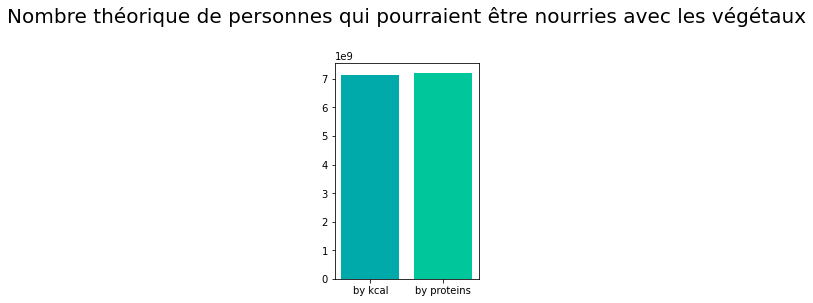


Proportion de personnes qui peuvent être nourries à partir de végétaux : 94.7%
Nombre théorique de personne qui peut être nourries dans le monde à partir de végétaux : 7,146,919,091



In [36]:
# chart
fig = plt.figure(figsize=[2,3])
ax = fig.add_axes([0,0,1,1])
labels = [
    'by kcal',
    'by proteins'
]
pop_values = [
    world_total_pop_could_be_fed_kcal_veg,
    world_total_pop_could_be_fed_prot_veg
]
ax.bar(labels,pop_values, color=['#00AAAA','#00C69C'])
plt.title("Nombre théorique de personnes qui pourraient être nourries avec les végétaux", pad=40, fontsize=20)
plt.show()

# result
print(f"""
Proportion de personnes qui peuvent être nourries à partir de végétaux : {prop_pop_could_be_fed_veg:.01%}
Nombre théorique de personne qui peut être nourries dans le monde à partir de végétaux : {world_pop_could_be_fed_veg:,}
""")

### Conclusion
La disponibilité alimentaire en végétaux à elle seule n'est pas suffisante pour couvrir les besoins de la population mondiale.
Il serait intéressant de voir si une partie de nouriture destinées au animaux peut être utiliser pour augmenter la poduction végétale.

***

# Disponibilité intérieure

## Utilisation de la disponibilité intérieure

Utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine.
* domestic_amount = food_amount  +  food_for_animals  +  other_use  +  seed  +  losses  +  processing

### Détail de la disponibilité intérieur par zone

In [37]:
df_food_domestic_avl_by_country = df_food_avl_by_country[
    [
        'country',
        'domestic_amount',
        'food_amount',
        'food_for_animals',
        'other_use',
        'seed',
        'losses',
        'processing'
    ]
].copy()

In [38]:
# proportion calculating
df_prop_domestic_avl_by_country = df_food_domestic_avl_by_country.copy()

df_prop_domestic_avl_by_country['food_amount_prop'] = prop(
    df_prop_domestic_avl_by_country['food_amount'], df_prop_domestic_avl_by_country['domestic_amount'])

df_prop_domestic_avl_by_country['food_amount_prop'] = prop(
    df_prop_domestic_avl_by_country['food_amount'], df_prop_domestic_avl_by_country['domestic_amount'])

df_prop_domestic_avl_by_country['food_for_animals_prop'] = prop(
    df_prop_domestic_avl_by_country['food_for_animals'], df_prop_domestic_avl_by_country['domestic_amount'])

df_prop_domestic_avl_by_country['other_use_prop'] = prop(
    df_prop_domestic_avl_by_country['other_use'], df_prop_domestic_avl_by_country['domestic_amount'])

df_prop_domestic_avl_by_country['seed_prop'] = prop(
    df_prop_domestic_avl_by_country['seed'], df_prop_domestic_avl_by_country['domestic_amount'])

df_prop_domestic_avl_by_country['losses_prop'] = prop(
    df_prop_domestic_avl_by_country['losses'], df_prop_domestic_avl_by_country['domestic_amount'])

df_prop_domestic_avl_by_country['processing_prop'] = prop(
    df_prop_domestic_avl_by_country['processing'], df_prop_domestic_avl_by_country['domestic_amount'])

# clean dataframe
cols_to_delete =     [
        'domestic_amount',
        'food_amount',
        'food_for_animals',
        'other_use',
        'seed',
        'losses',
        'processing'
    ]

for i in cols_to_delete:
    del df_prop_domestic_avl_by_country[i]

In [39]:
display(df_prop_domestic_avl_by_country.head(5))

,country,food_amount_prop,food_for_animals_prop,other_use_prop,seed_prop,losses_prop,processing_prop
0,Afghanistan,79.43,5.68,3.07,2.92,8.40,0.47
1,Afrique du Sud,48.67,8.67,1.43,0.41,3.58,37.25
2,Albanie,73.06,13.87,3.66,1.16,5.80,2.37
3,Algérie,74.43,10.21,4.00,1.05,8.80,1.49
4,Allemagne,48.83,18.62,4.75,0.96,2.33,24.55


### Répartition de la disponibilité intérieur mondiale

In [40]:
df_food_domestic_avl_world = df_food_domestic_avl_by_country.sum()

In [41]:
# world domestic avl proportion
domestic_world_amount = df_food_domestic_avl_world.domestic_amount
df_food_domestic_avl_world = df_food_domestic_avl_world.drop(['country', 'domestic_amount'])

# proportions
df_food_domestic_avl_world['food_amount'] = prop(df_food_domestic_avl_world['food_amount'], domestic_world_amount)
df_food_domestic_avl_world['food_for_animals'] = prop(df_food_domestic_avl_world['food_for_animals'], domestic_world_amount)
df_food_domestic_avl_world['other_use'] = prop(df_food_domestic_avl_world['other_use'], domestic_world_amount)
df_food_domestic_avl_world['seed'] = prop(df_food_domestic_avl_world['seed'], domestic_world_amount)
df_food_domestic_avl_world['losses'] = prop(df_food_domestic_avl_world['losses'], domestic_world_amount)
df_food_domestic_avl_world['processing'] = prop(df_food_domestic_avl_world['processing'], domestic_world_amount)
df_food_domestic_avl_world = df_food_domestic_avl_world.sort_values(ascending=False)

In [42]:
display(df_food_domestic_avl_world)

food_amount        49.37
processing         22.45
food_for_animals   13.23
other_use           8.82
losses              4.65
seed                1.58
dtype: object

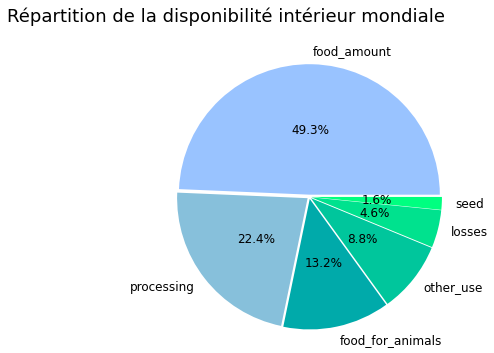

In [43]:
# chart
pie, ax = plt.subplots(figsize=[5,5])
labels = df_food_domestic_avl_world.keys()
colors = ['#99C3FF','#87C0DB','#00AAAA','#00C69C','#00E28E','#00FF80']
plt.pie(x=df_food_domestic_avl_world, autopct="%.1f%%", explode=[0.02]*6, labels=labels, pctdistance=0.5, radius=1.2, textprops=dict(size=12), colors=colors)
plt.title("Répartition de la disponibilité intérieur mondiale", fontsize=18, loc="right", pad=40)
plt.show()

### Conclusion
Presque la moitié de la nourriture disponible est destinée à la consommation humaine.  
Les leviers pour améliorer la part de nourriture pour les humains, serait de réduire les pertes avec de meilleurs processus de production et l'apport à l'élevage. 

***

## Disponibilité par habitant

### Pays ayant le plus de disponibilité/habitant

#### Disponibilité en kcal

In [44]:
df_food_avl_by_country_kcal_desc = df_food_avl_by_country[['country', 'food_supply_kcal_avl']]
df_food_avl_by_country_kcal_desc = df_food_avl_by_country_kcal_desc.sort_values(["food_supply_kcal_avl"], ascending=False).iloc[:10]
display(df_food_avl_by_country_kcal_desc)

,country,food_supply_kcal_avl
11,Autriche,"3,770.00"
16,Belgique,"3,737.00"
157,Turquie,"3,708.00"
169,États-Unis d'Amérique,"3,682.00"
74,Israël,"3,610.00"
72,Irlande,"3,602.00"
75,Italie,"3,578.00"
89,Luxembourg,"3,540.00"
166,Égypte,"3,518.00"
4,Allemagne,"3,503.00"


#### Disponibilité en protéines

In [45]:
df_food_avl_by_country_prot_desc = df_food_avl_by_country[['country', 'prot_amount_g_avl']]
df_food_avl_by_country_prot_desc = df_food_avl_by_country_prot_desc.sort_values(["prot_amount_g_avl"], ascending=False).iloc[:10]
display(df_food_avl_by_country_prot_desc)

,country,prot_amount_g_avl
73,Islande,133.06
33,Chine - RAS de Hong-Kong,129.07
74,Israël,128.00
88,Lituanie,124.36
94,Maldives,122.32
52,Finlande,117.56
89,Luxembourg,113.64
102,Monténégro,111.90
119,Pays-Bas,111.46
2,Albanie,111.37


### Pays ayant le moins de disponibilité/habitant

#### Disponibilité en kcal

In [46]:
df_food_avl_by_country_asc = df_food_avl_by_country[['country', 'food_supply_kcal_avl']]
df_food_avl_by_country_asc = df_food_avl_by_country_asc.sort_values(["food_supply_kcal_avl"]).iloc[:10]
display(df_food_avl_by_country_asc)

,country,food_supply_kcal_avl
127,République centrafricaine,"1,879.00"
164,Zambie,"1,924.00"
91,Madagascar,"2,056.00"
0,Afghanistan,"2,087.00"
65,Haïti,"2,089.00"
132,République populaire démocratique de Corée,"2,093.00"
150,Tchad,"2,109.00"
165,Zimbabwe,"2,113.00"
114,Ouganda,"2,126.00"
152,Timor-Leste,"2,129.00"


#### Disponibilité en protéines

In [47]:
df_food_avl_by_country_asc = df_food_avl_by_country[['country', 'prot_amount_g_avl']]
df_food_avl_by_country_asc = df_food_avl_by_country_asc.sort_values(["prot_amount_g_avl"]).iloc[:10]
display(df_food_avl_by_country_asc)

,country,prot_amount_g_avl
87,Libéria,37.66
62,Guinée-Bissau,44.05
103,Mozambique,45.68
127,République centrafricaine,46.04
91,Madagascar,46.69
65,Haïti,47.70
165,Zimbabwe,48.32
39,Congo,51.41
114,Ouganda,52.64
138,Sao Tomé-et-Principe,53.10


### Conclusion
On note une disparité géographique des pays dans la disponibilté alimentaire. Ceux-qui ont le plus de nourriture sont en Europe alors que ceux qui ont le moins de nourriture disponible sont en Afrique.

***

## Répartions de la disponibilité en céréales

### Disponibilité en céréales

In [48]:
# select vegetables products
#('Maïs', 'Blé', 'Céréales, Autres', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Seigle', 'Sorgho')
df_cereals_avl = df_foods_avl[df_foods_avl['is_cereals'] == True]

display(df_cereals_avl.head(1))

,country,products,food_origin,production,import_amount,export_amount,stock_variation,domestic_amount,food_amount_kg_avl,food_supply_kcal_avl,prot_amount_g_avl,fat_supply_g_avl,food_amount,food_for_animals,other_use,losses,seed,processing,is_cereals
7,Afghanistan,Blé,vegetale,"5,169.00","1,173.00",0.00,-350.00,"5,992.00",160.23,"1,369.00",36.91,4.69,"4,895.00",0.00,0.00,775.00,322.00,0.00,True


In [49]:
# format dataframe
df_cereals_avl = df_cereals_avl[[
    'country', 'products', 'food_amount', 'food_for_animals', 'other_use', 'seed', 'losses', 'processing'
]]
df_cereals_avl['food_amount'] = df_cereals_avl['food_amount'] * 1000
df_cereals_avl['food_for_animals'] = df_cereals_avl['food_for_animals'] * 1000
df_cereals_avl['other_use'] = df_cereals_avl['other_use'] * 1000
df_cereals_avl['seed'] = df_cereals_avl['seed'] * 1000
df_cereals_avl['losses'] = df_cereals_avl['losses'] * 1000
df_cereals_avl['processing'] = df_cereals_avl['processing'] * 1000
df_cereals_avl = df_cereals_avl.sum()

# total cereals avl
total_cereals = df_cereals_avl['food_for_animals'] + df_cereals_avl['food_amount'] + df_cereals_avl['other_use'] + df_cereals_avl['seed'] + df_cereals_avl['losses'] + df_cereals_avl['processing']

display(df_cereals_avl)

country             AfghanistanAfghanistanAfghanistanAfghanistanAf...
products            BléCéréales, AutresMaïsMilletOrgeRiz (Eq Blanc...
food_amount                                          1,029,010,000.00
food_for_animals                                       873,535,000.00
other_use                                              234,787,000.00
seed                                                    68,538,000.00
losses                                                 107,120,000.00
processing                                              94,589,000.00
dtype: object

In [50]:
# proportion
prop_cereals_for_humains = df_cereals_avl['food_amount'] / total_cereals
prop_cereals_for_animals = df_cereals_avl['food_for_animals'] / total_cereals
prop_cereals_for_other_use = df_cereals_avl['other_use'] / total_cereals
prop_cereals_for_seed = df_cereals_avl['seed'] / total_cereals
prop_cereals_for_losses = df_cereals_avl['losses'] / total_cereals
prop_cereals_for_processing = df_cereals_avl['processing'] / total_cereals

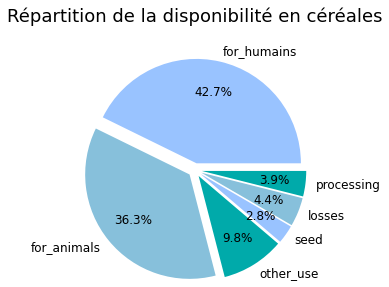


Quantité de céréales (tonnes): 

- Pour les humains : 1,029,010,000.0
- Pour les animaux : 873,535,000.0
- Pour les autres utilisations : 234,787,000.0



In [51]:
# chart
pie, ax = plt.subplots(figsize=[6,4])
labels = ['for_humains', 'for_animals', 'other_use', 'seed', 'losses', 'processing']
colors = ['#99C3FF','#87C0DB','#00AAAA','#99C3FF','#87C0DB','#00AAAA']
cereals_prop_values = [
    prop_cereals_for_humains,
    prop_cereals_for_animals,
    prop_cereals_for_other_use,
    prop_cereals_for_seed,
    prop_cereals_for_losses,
    prop_cereals_for_processing
]
plt.pie(x=cereals_prop_values, autopct="%.1f%%", explode=[0.08]*6, labels=labels, pctdistance=0.7, radius=1.2, textprops=dict(size=12), colors=colors)
plt.title("Répartition de la disponibilité en céréales", fontsize=18, pad=40)
plt.show()

print(f"""
Quantité de céréales (tonnes): 

- Pour les humains : {df_cereals_avl['food_amount']:,}
- Pour les animaux : {df_cereals_avl['food_for_animals']:,}
- Pour les autres utilisations : {df_cereals_avl['other_use']:,}
""")

### Surproduction de protéines

In [52]:
# difference population could be fed between kcal and protein
diff_pop_kcal_betw_prot = total_pop_could_be_fed_prot - total_pop_could_be_fed_kcal
prop_diff_kcal_betw_prot = diff_pop_kcal_betw_prot / total_pop_could_be_fed_prot

# cereals amount can be redistribute
cereals_can_be_rescu = round(df_cereals_avl['food_for_animals'] * prop_diff_kcal_betw_prot)

In [53]:
print(f"""
Quantité de céréales qui peuvent être redistribuée : {cereals_can_be_rescu:,} (tonnes).
""")


Quantité de céréales qui peuvent être redistribuée : 232,819,137 (tonnes).



### Conclusion
La part de céréales destinée aux animaux est importante par rapport à celle destinée aux humains.  
Sachant que la production de protéines est supérieur au besoin alimentaire de la population mondiale, il y a une quantité importante de céréales destinées aux animaux qui peut être redistribuée aux humains.

***

## Produits les plus exportés par les pays ayant la proportion de personnes sous-alimentées est la plus forte

In [54]:
# select country under nourishement
df_zone_is_under_nourish = df_under_nourish_pop.loc[df_under_nourish_pop['is_under_nourish']].copy()

# select food avl of country under nourishement
df_food_avl_by_country_under_nourish = df_foods_avl.merge(df_zone_is_under_nourish, on='country')
df_food_avl_of_country_under_nourish = df_food_avl_by_country_under_nourish[['domestic_amount','products', 'production', 'import_amount', 'export_amount', 'food_amount']]

# total food avl by products
df_top_export = df_food_avl_of_country_under_nourish.groupby(['products']).sum()
df_top_export = df_top_export.sort_values(by='export_amount', ascending=False).reset_index()
df_top_export['export/humain_food'] = prop(df_top_export['export_amount'], df_top_export['food_amount'])

In [55]:
display(df_top_export.head(10))

,products,domestic_amount,production,import_amount,export_amount,food_amount,export/humain_food
0,Maïs,"252,125.00","254,789.00","56,769.00","53,912.00","91,045.00",59.21
1,Huile de Palme,"30,237.00","52,986.00","24,192.00","46,235.00","9,833.00",470.20
2,Manioc,"190,166.00","221,161.00","5,423.00","35,761.00","84,210.00",42.47
3,Riz (Eq Blanchi),"305,283.00","325,569.00","24,557.00","32,460.00","238,592.00",13.60
4,Blé,"281,422.00","225,691.00","92,346.00","32,274.00","221,156.00",14.59
5,Sucre Eq Brut,"87,994.00","84,019.00","32,737.00","25,251.00","80,553.00",31.35
6,Bananes,"69,507.00","83,868.00","3,062.00","17,905.00","56,140.00",31.89
7,Soja,"74,338.00","80,684.00","14,326.00","15,628.00","2,954.00",529.05
8,Lait - Excl Beurre,"326,655.00","307,510.00","33,980.00","15,159.00","269,571.00",5.62
9,Poissons Pelagiques,"17,918.00","22,744.00","9,602.00","13,114.00","13,177.00",99.52


Les pays en difficultés exportent principalement des produits issus de la production végétale.  
Les proportions d'exportations par rapport à la production sont élevées pour le maîs, le manioc, le soja et les poissons.

***

## Exemple de la Thailande

### Exportation du manioc

In [56]:
# select Thailand
df_food_thai_products_manioc_avl = df_food_avl_by_country_under_nourish.loc[
    (df_food_avl_by_country_under_nourish['country'] == 'Thaïlande') 
    & (df_food_avl_by_country_under_nourish['products'] == 'Manioc')]
df_food_thai_products_manioc_avl = df_food_thai_products_manioc_avl[
    ['domestic_amount', 'products', 'production', 'import_amount', 'export_amount', 'food_amount']]

# proportion
df_food_thai_products_manioc_avl['export/production'] = prop(df_food_thai_products_manioc_avl['export_amount'], df_food_thai_products_manioc_avl['production'])
df_food_thai_products_manioc_avl['domestic_avl/production'] = prop(df_food_thai_products_manioc_avl['domestic_amount'], df_food_thai_products_manioc_avl['production'])

In [57]:
display(df_under_nourish_pop.loc[(df_under_nourish_pop['country'] == 'Thaïlande')])
display(df_food_thai_products_manioc_avl)

,country,year,nb_under_nourish,pop_size,prop_under_nourish,is_under_nourish
185,Thaïlande,2017,"6,200,000.00","69,209,810.00",8.96,True


,domestic_amount,products,production,import_amount,export_amount,food_amount,export/production,domestic_avl/production
8082,"6,264.00",Manioc,"30,228.00","1,250.00","25,214.00",871.00,83.41,20.72


### Conclusion

In [58]:
print(f"""
La Thaïlande exporte {df_food_thai_products_manioc_avl.iloc[0]['export_amount']} milliers de tonnes de manioc.
Cela représente {df_food_thai_products_manioc_avl.iloc[0]['export/production']}% de sa production.
Avec les importations, il reste {df_food_thai_products_manioc_avl.iloc[0]['domestic_amount']} milliers de tonnes de disponibles.
""")


La Thaïlande exporte 25214.0 milliers de tonnes de manioc.
Cela représente 83.41% de sa production.
Avec les importations, il reste 6264.0 milliers de tonnes de disponibles.



# Aide alimentaire

***

## Pays qui ont le plus bénéficié d’aide depuis 2013

In [59]:
df_foods_help_by_year = df_foods_help.groupby(['country', 'year']).sum().reset_index()
display(df_foods_help_by_year.head(5))

,country,year,help_product_value
0,Afghanistan,2013,128238
1,Afghanistan,2014,57214
2,Algérie,2013,35234
3,Algérie,2014,18980
4,Algérie,2015,17424


### Aide alimentaire en volume

In [60]:
# select years
df_foods_help_by_year = df_foods_help_by_year[df_foods_help_by_year["year"] > 2012]

# sums
df_foods_help_by_country = df_foods_help_by_year.groupby(['country']).sum()
del df_foods_help_by_country['year']

df_foods_help_by_country = df_foods_help_by_country.sort_values(["help_product_value"], ascending=False)
top_foods_help_by_country = df_foods_help_by_country.iloc[:10]

In [61]:
display(top_foods_help_by_country)

,help_product_value
country,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


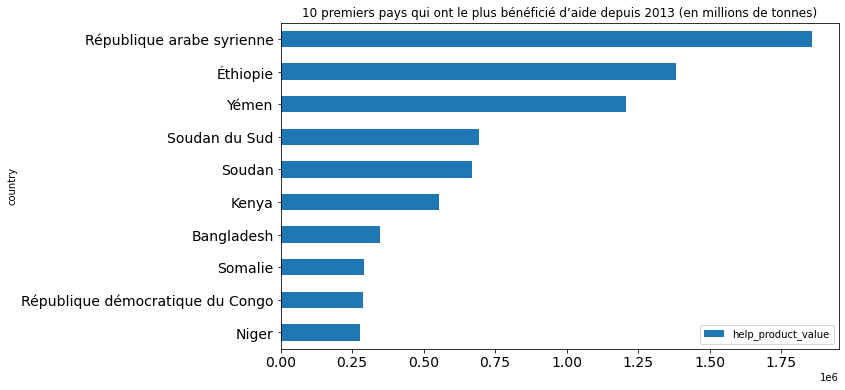

In [62]:
# chart
ax = top_foods_help_by_country.plot.barh(title="10 premiers pays qui ont le plus bénéficié d’aide depuis 2013 (en millions de tonnes)",
                                         figsize=(10,6), fontsize=14)
ax.invert_yaxis()

### Conclusion
Les pays ayant réçu le plus d'aide alimentaire sont localisés principalement en Afrique et au Moyen-Orient. On note cependant que ces pays ne sont pas les plus en situation de sous-nutrition.

## Evolution de la sous-nutrition et de l'aide alimentaire

### Evolution de la proportion de personne en état de sous-nutrition

In [63]:
evo_pop_under_nourish = df_under_nourish.groupby(['year']).sum()
evo_pop = df_pop.groupby(['year']).sum()
evo_pop_under_nourish = evo_pop_under_nourish.merge(evo_pop, on='year')
evo_pop_under_nourish['prop_under_nourish'] = round(
    evo_pop_under_nourish['nb_under_nourish'] / evo_pop_under_nourish['pop_size'] * 100, 2)

In [64]:
display(evo_pop_under_nourish)

,nb_under_nourish,pop_size,prop_under_nourish
year,,,
2013,"528,300,000.00","7,210,845,848.00",7.33
2014,"523,710,000.00","7,295,557,771.00",7.18
2015,"524,900,000.00","7,380,067,075.00",7.11
2016,"528,800,000.00","7,464,294,742.00",7.08
2017,"535,900,000.00","7,548,134,111.00",7.10
2018,"544,390,000.00","7,631,368,523.00",7.13


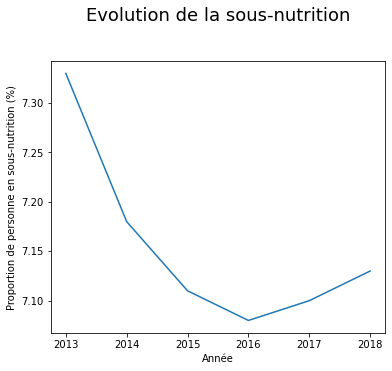

In [65]:
# chart
pie, ax = plt.subplots(figsize=[6,5])
plt.plot(evo_pop_under_nourish['prop_under_nourish'])
plt.title("Evolution de la sous-nutrition", fontsize=18, pad=40)
plt.ylabel('Proportion de personne en sous-nutrition (%)')
plt.xlabel('Année')
plt.show()

Entre 2013 et 2016, la sous-nutrition dans le monde était en baisse.  
On remarque pour 2017 et 2018, un hausse de celle-ci.

### Evolution de l'aide humanitaire

In [66]:
df_foods_help = df_foods_help_by_year.groupby(['year']).sum()
display(df_foods_help)

,help_product_value
year,
2013,4165674
2014,3939152
2015,2187507
2016,743568


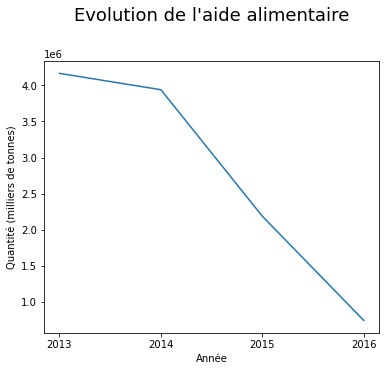

In [67]:
# chart
pie, ax = plt.subplots(figsize=[6,5])
plt.plot(df_foods_help['help_product_value'])
plt.title("Evolution de l'aide alimentaire", fontsize=18, pad=40)
ax.locator_params(integer=True)
plt.ylabel('Quantité (milliers de tonnes)')
plt.xlabel('Année')
plt.show()

La quantité d'aide alimentaire à fortement diminuée entre 2013 et 2016.

### Conclusion
La baisse de la sous-nutrition entre 2013 et 2016 a induis une baisse de l'aide alimentaire.  
Il serait interessant de voir si la quantité d'aide à augmentée depuis 2016 suite à la hausse du nombre de personne en sous-nutrition. Si ce n'est pas le cas, il faudrait augmenter l'aide.

# Conclusion

* Sous-nutrition  
536 millions de personnes en sous-nutrition (7.1%).  
En augmentation depuis 2016.  

* Disponibilité alimentaire  
La production mondiale de nourriture est suffisante pour nourrir la population mondiale.
Celle-ci n'est pas également répartie entre les pays.

* Aide alimentaire  
L'aide est en baisse depuis 2013, il faut continuer nos efforts.